In [1]:
from onecodex.api import Api
from onecodex.viz import *
ocx = Api(base_url="http://localhost:3000", api_key='25d75fc1d7744c8f83002a4fa5f84502')

In [2]:
a = ocx.Classifications.get('f88503b592ea4cb1')
b = ocx.Classifications.get('92f8dbd18b6b4945')
c = ocx.Classifications.get('e302dcb2218b4577')
d = ocx.Classifications.get('fa08fb004fc04cba')

In [3]:
from onecodex.viz.helpers import collate_analysis_results
df = collate_analysis_results([a, b], metric='readcount')
df.columns = ['{} ({})'.format(v[1], v[0]) for v in df.columns.values]

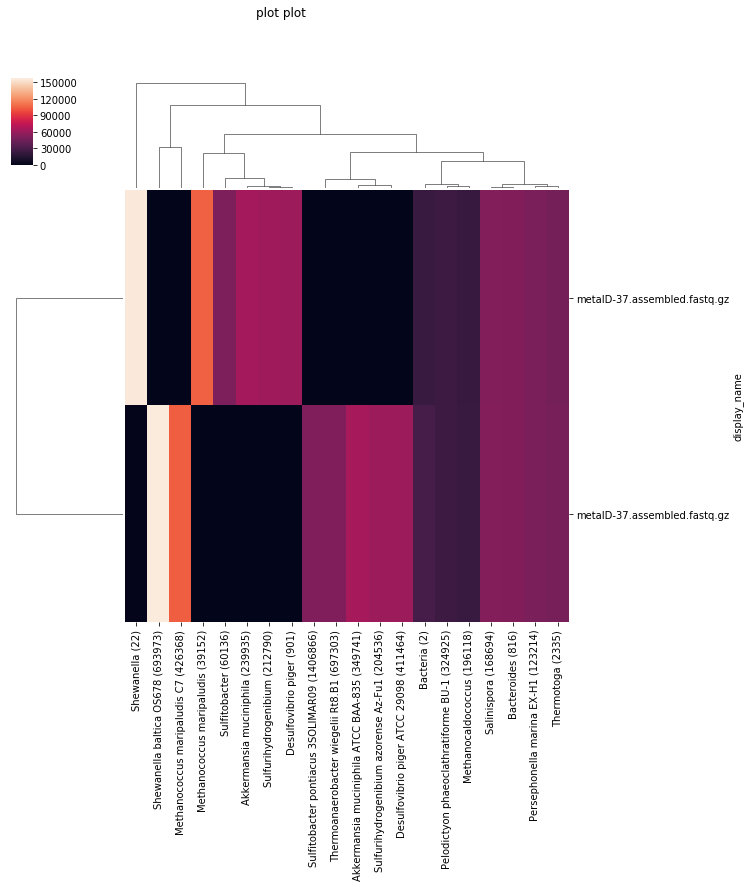

In [4]:
from onecodex.viz import *
plot_heatmap([a, b], title='plot plot', metric='readcount')

In [5]:
idx = df.sum(axis=0).sort_values(ascending=False).head(3).index
df = df.loc[:, idx]
df.loc[:, df.max() >= 100]

,Shewanella baltica OS678 (693973),Shewanella (22),Salinispora (168694)
f88503b592ea4cb1,0.0,156272.0,52088.0
92f8dbd18b6b4945,157366.0,1014.0,52707.0


In [6]:
from onecodex.viz.helpers import normalize_analyses, collate_analysis_results
normed_analyses, metadata = normalize_analyses([a,b,c,d])
df = collate_analysis_results(normed_analyses, metric='readcount')

In [7]:
from sklearn.decomposition import PCA
import pandas
pca = PCA()
pca_vals = pca.fit(df.values).transform(df.values)
pca_vals = pandas.DataFrame(pca_vals, index=df.index)
pca_vals.rename(columns=lambda x: "PCA{}".format(x + 1), inplace=True)
pca_vals

,PCA1,PCA2,PCA3,PCA4
f88503b592ea4cb1,-183626.938316,118024.153736,0.086769,1.487422e-09
92f8dbd18b6b4945,196948.063044,102580.643089,-0.469123,-1.528399e-09
e302dcb2218b4577,-6706.358623,-110335.466055,-1210.307371,2.732889e-10
fa08fb004fc04cba,-6614.766105,-110269.330769,1210.689725,-2.328449e-10


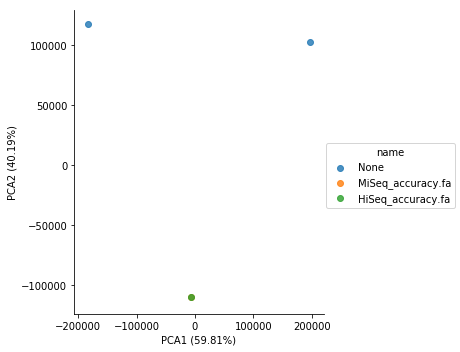

In [9]:
plot_pca([a, b, c, d], metric='readcount', color_by='name')